# Final Project Template

# ETL, Null Reporting and SQL Querying MRTS Data

**Sanabu Washizuka**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. Extract-Transform-Load](#2.-Extract-Transform-Load)
    - [2.1 The ETL Process](#2.1-The-ETL-Process)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Read the Data Using Python](#2.4-Reading-the-Data-Using-Python)
         - [2.4.1 Reading Sample Data](#2.4.1-Reading-Sample-Data)
         - [2.4.2 Reading the MRST Data](#2.4.2-Reading-the-MRST-Data)
    - [2.5 Writing an Installation Script](#2.5-Writing-an-Installation-Script)
    - [2.6 Creation of a Null Analysis Report](#-2.6-Creation-of-a-Null-Analysis-Report)
- [3. Analysis and Visualization](#3.-Project-Description)
    - [3.1 Running Queries in MySQL Workbech](#3.1-Running-Queries-in-MySQL-Workbech)
    - [3.2 Running Queries From Python](#3.2-Running-Queries-From-Python)
    - [3.3 Explore Trends](#3.3-Explore-Trends)
    - [3.4 Explore Percentage Change](#3.4-Explore-Percentage-Change)
    - [3.5 Explore Rolling Time Windows](#3.5-Explore-Rolling-Time-Windows)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This project demonstrates an ETL process, loading data from a Microsoft Excel file into a MySQL database, in addition to demonstrating an example of null value reporting. An analysis of the data set is also included, using SQL queries to retrieve data from the database created from the previous process and using analysis techniques including visualizations, trend analysis, percent change, rolling averages.

For the analysis, it was found that a trend of general growth can be found in most markets with disruptions in 2009 (the U.S. housing crisis) and 2020 (the COVID-19 pandemic.)

[Back to top](#Index)


## 1. Introduction

This project aims to analyze trends over time of a raw, uncleaned time series data set. The data set comes from the U.S. Census Bureau's Monthly Retail Trade Survey data. The data is a report of monthly sales across several industry categories across the U.S. and spans from 1992 to early 2021, divided into seasonally adjusted and non-seasonally adjusted data.

The non-seasonally adjusted dataset will be uploaded (all months of all years of all categories) including its null values to mimic a data lake ecosystem, providing a full and accurate representation of the data set. This allows for analysis teams to use their discretion on what ranges of the data to perform analysis on and how to interpret null values. In order to help facilitate this flexibility, a null report will be created after the ETL process, describing the location and scope of null values. Some sample analyses will be made after the ETL process, referencing the null report and demonstrating successful querying and analysis of the database. Included in this analysis are simple trend analyses, as well as reviews of percentage change and trends through rolling windows of the data.

#### Workflow model
- Raw data observation
- Cleaning using non-python methods
- ETL using python
- Performing SQL queries through python script
- Observing trends through DataFrames and visual analysis

#### Processes used to solve the identified data engineering problem
- Separate Excel sheets into separate csv files for easy reading
- Transpose data set into transactional database shape
- Loading to a MySQL database
- Data verification using SQL queries
- Null report generation

[Back to top](#Index)

## 2. Extract-Transform-Load

[Back to top](#Index)

### 2.1 The ETL Process

The raw data will first be explored to understand its shape, data types and to begin planning an approach to transpose the data shape into that of a transactional database. A preparation step outside of python was conducted using VBA script for easier reading by the python program. The python program will then create the SQL table to store the data on a schema already prepared through MySQL Workbench, and perform any data type transformations and transposing of the data, uploading the entire data set at the end of the process. A data validity check will be performed through SQL queries sent through python script, calculating counts and sums of various data.

For easy referencing by analyst teams, a null report will also be generated describing the locations of null values in time through a Gantt chart and a text report.

[Back to top](#Index)

### 2.2 Data Exploration

The data set is a monthly reporting of sales from various businesses aggregated into like categories, provided by the U.S. Census Bureau. The purpose of the dataset is to provide estimates of sales from retail and food services within the U.S. The information is a by-mail survey, completed by individual business owners, and is aggregated by the Census Bureau. This data is used to measure important economic factors including national GDP, consumer price indexes, productivity measures, as well as consumer spending.

The data is provided in the form of an Excel workbook, with the data separated by year on separate sheets. Each sheet roughly consists of a relational chart with months serving as column headers, and business type labels serving as each row. 29 sheets are included in the workbook, representing the years 1992 to 2021. The year 2021 has only the first two months of the year represented. Additionally, both seasonally adjusted and unadjusted data sets are available for each year on each sheet. The ETL process will extract only the unadjusted values.

[Back to top](#Index)

### 2.3 Data Preparation

The data preparation will first use VBA script(found in "mrtssales92-present.xlsm" as  Module1, sub "csv_separator") to separate each csv and position the data in a format easily accessible for the python csv reader, as well as adjusting column header inconsistencies. Python will then perform the primary ETL process, reading each of the csv files and transposing the data into the form of a transactional database, so that each record is a unique combination of business category, sale, and date.

Before cleaning:<br>
<img src="excel_before.png" width="600"/>

After cleaning:<br>
<img src="csv_after.png" width="600"/>


In order to allow for the freedom of analyst teams to review the entire data set and interpret null values as they need, no interpolation of null values will be done in this step. In exchange, the aforementioned null report will be generated.

[Back to top](#Index)

### 2.4 Read the Data Using Python

Python uses the csv module for convenient interpretation of csv files. The entire csv document is read as an iterable of individual rows, with each row read as an inner iterable object, allowing for convenient accessing of values across the data. The individual values can then be transformed into different formats as necessary and loaded into a delivery method, in this case, part of a SQL query string.

[Back to top](#Index)

### 2.4.1 Reading Sample Data

The python script was tested on a single, cleaned csv representing one year's worth of the non-seasonally adjusted data, across all categories. The python script first reads the file name to retrieve the date year and then reads the column headers to retrieve the month labels. The reader then moves into the data, retrieving number IDs and text labels for the business categories, and the sale values themselves, loading them into a SQL query of INSERT INTO VALUES() statements. The aforementioned year and month labels are also  transformed into date strings accepted by MySQL's Date data type and added as another value. A single query is built by concatenating the VALUES() statements and then sent to the database.

[Back to top](#Index)

### 2.4.2 Reading the MRTS Data

The entire data set was loaded by using the os module and retrieving a list of names of all the csv files generated off the data set. Each file is then loaded and ready by the csv reader in a loop, and the script is built off the loops of each file, resulting in a single query for the entire data set consisting of over 22,000 records.

*NOTE: Before running the python program, some set up is requried:
- Creation of the folder `csv` in the directory of this script
- Running the VBA script Module1 Sub "csv_separator" from `mrtssales92-present.xlsm` within the directory of this script (script code can also be found in file `Module1.bas`)
- Creation of the schema `mrts_data` within MySQl Workbench

In [1]:
import os
import csv
import yaml
import mysql.connector
from datetime import datetime, date, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define function to convert month abbreviations to numbers
def month_convert(month):
    return datetime.strptime(month, "%b").month

In [3]:
# get list of all csv's
csv_list = os.listdir("csv/")
print(csv_list)

['mrtssales92_1992.csv', 'mrtssales92_1993.csv', 'mrtssales92_1994.csv', 'mrtssales92_1995.csv', 'mrtssales92_1996.csv', 'mrtssales92_1997.csv', 'mrtssales92_1998.csv', 'mrtssales92_1999.csv', 'mrtssales92_2000.csv', 'mrtssales92_2001.csv', 'mrtssales92_2002.csv', 'mrtssales92_2003.csv', 'mrtssales92_2004.csv', 'mrtssales92_2005.csv', 'mrtssales92_2006.csv', 'mrtssales92_2007.csv', 'mrtssales92_2008.csv', 'mrtssales92_2009.csv', 'mrtssales92_2010.csv', 'mrtssales92_2011.csv', 'mrtssales92_2012.csv', 'mrtssales92_2013.csv', 'mrtssales92_2014.csv', 'mrtssales92_2015.csv', 'mrtssales92_2016.csv', 'mrtssales92_2017.csv', 'mrtssales92_2018.csv', 'mrtssales92_2019.csv', 'mrtssales92_2020.csv', 'mrtssales92_2021.csv']


In [28]:
# Ensure database is created in MySQL Workbench before running s
# Load connection configuration from yaml doc and create connection dictionary
db = yaml.safe_load(open("db.yaml"))
config = {
    "user": db["user"],
    "password": db["pwrd"],
    "host": db["host"],
    "database": "mrts_data",
    "auth_plugin": "mysql_native_password"
}

# Set up connection
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor(buffered = True)

In [29]:
# Queries to create table

# Initialize string for installation script file
script_string = ""

# Define table
table_name = "mrts_data"

# Drop table if it exists
query = f'DROP TABLE IF EXISTS {table_name}'
cursor.execute(query)
cnx.commit()

# Add drop table query to installation script output
script_string = query + ";\n\n"

# Table creation query. Include RecordId as a primary key
query = f'CREATE TABLE {table_name} (\n\
    `RecordId` INT NOT NULL AUTO_INCREMENT,\n\
    `NAICSCode` VARCHAR(255) NULL,\n\
    `BusinessType` VARCHAR(255) NOT NULL,\n\
    `Sale` INT NULL,\n\
    `Date` DATE NOT NULL,\n\
    PRIMARY KEY (RecordId))'
cursor.execute(query)
cnx.commit()

# Add table creation query to installation script output
script_string = script_string + query + ";\n\n"
temp=1

In [30]:
# Load data

# Initialize INSERT INTO query string
query_string = f'INSERT INTO {table_name}\nVALUES'
# For each csv file, perform transformations
for file in csv_list:
    # Retrieve year for date value
    date_year = file[-8:-4]

    # Use encoding utf-8-sig to remove whitespace characters
    with open(f'csv/{file}', encoding="utf-8-sig") as csv_file:
        # Get all csv column headers with a month
        csv_reader = csv.reader(csv_file, delimiter=",")
        header_list = list(next(csv_reader))[2:]

        # Handle data values for each row in the rest of the csv
        #   and construct VALUES line
        for record in csv_reader:
            # Watch for business categories with no tags
            if record[0]  in ("(S)", "", "(NA)"):
                NAICS_code = "NULL"
            else:
                NAICS_code = f'"{record[0]}"'
            biz_type = f'"{record[1]}"'
            # Review each sales value in the record after the two
            #   business category labels "NAICSCode", "BusinessType"
            for n in range(2,14):
                # End loop if at the end of the dataset (after February 2021)
                if "CY" in header_list[n-2]:
                    break
                # Retrieve sales values
                else:
                    query_line = ""
                    # Insert NULL keyword for unavailable values
                    if record[n] in ("(S)", "", "(NA)"):
                        value = "NULL"
                    else:
                        value = ''.join(record[n].split(","))
                    date_val = f'"{date_year}-{month_convert(header_list[n-2][0:3])}-01"'
                    # Build the query line and attach onto the full string
                    query_line = f'(default, {NAICS_code}, {biz_type}, {value}, {date_val}),\n'
                    query_string = f'{query_string}{query_line}'

# Finish off query, ensuring to remove the last comma
query = (f'{query_string[0:-2]}')
# Execute query
cursor.execute(query)
cnx.commit()

# Add query for installation script output
script_string = script_string + query + ";\n\n"

# Close/clean SQL operations and open csv file
cursor.close()
cnx.close()

[Back to top](#Index)

### 2.5 Writing an Installation Script

Throughout the transformation code above, the full installation script is assembled in `script_string`, concatenating the initial table drop and table creation statements,  as well as a `VALUES INTO()` statement for each sale value in the data set (including null values). The entire string is then written to a .sql file as `mrts_data_installation.sql`.

In [31]:
# Create installation file
script_file = open(f'{table_name}_installation.sql', "w")
script_file.writelines(script_string)
script_file.close()

#### 2.6 Creation of a Null Analysis Report

One issue that arises when trying to handle null values during an ETL step is that the interpretation of null values varies depending on the scope the analysis, and that a transformation of null values during ETL will fix the values to a specific interpretation.

For example, some categories may have null values reported for an entire year through a few consecutive years. If an analysis were to be made of a single year out of those years, an appropriate handling might be to drop the categories themselves from the analysis. However, if an analysis over all categories were to be required, those categories would then have to be included and either some interpretation of the null values would be necessary. Regardless of which approach is taken, deciding a method to handle null values at the ETL step will decide the completeness and/or accuracy of all analyses made in the future, resulting in one of the following scenarios:
- Drop any rows/columns with null values, reducing the available data set to an unknown scope and fragmentation
- Interpolate null values, creating appropriate representations across one scope and dimension of analysis, but erroneous representations in another. (For example, interpolating null values as averages of the data set may be appropriate if only a few months are nulls over a single year of data. Doing the same for all months of the first 10 years starting from 1992 will erroneously inflate the values with the generally higher values from 2020.)

A solution to allow flexibility to access all of the available data and interpret null values as required by an individual analysis, is to provide a report of null values to communicate to analyst what categories have null values and how many, and where they exist within the data. This allows analysts to quickly identify null value locations and appropriately interpret them according to the specific scope of analysis conducted. This is done in this project in the form of a Gantt chart, `null_plot.png` and a text report, `null_report(2022_12_04).txt`.


In [32]:
# Set up connection
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor(buffered = True)

# Query entire dataset and read to DataFrame
query = f'SELECT * FROM {table_name}'
mrts_raw = pd.read_sql(query, con=cnx)

# Make backup csv of cleaned data
mrts_raw.to_csv("temp_df.csv", index=True, header=True)

# Pivot to show sales of business types by dates
mrts_pivot = mrts_raw.pivot(index=["Date"], columns=["BusinessType"], values="Sale")
mrts_pivot

C:\Users\sanab\AppData\Local\Temp\ipykernel_22016\1826079087.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  mrts_raw = pd.read_sql(query, con=cnx)


BusinessType,All other gen. merchandise stores,All other home furnishings stores,Automobile and other motor vehicle dealers,Automobile dealers,"Automotive parts, acc., and tire stores","Beer, wine, and liquor stores",Book stores,Building mat. and garden equip. and supplies dealers,Building mat. and supplies dealers,Clothing and clothing access. stores,...,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)",Shoe stores,Sporting goods stores,"Sporting goods, hobby, musical instrument, and book stores",Supermarkets and other grocery (except convenience) stores,Used car dealers,Used merchandise stores,Warehouse clubs and superstores,Women's clothing stores
Date,,,,,,,,,,,,,,,,,,,,,
1992-01-01,2111.0,NaN,26788.0,25800.0,3023.0,1509.0,790.0,8964.0,7637.0,6938.0,...,130683.0,100872.0,1206.0,972.0,3023.0,NaN,1744.0,371.0,2579.0,1873.0
1992-02-01,2149.0,NaN,28203.0,27031.0,3014.0,1541.0,539.0,9023.0,7567.0,7524.0,...,131244.0,100027.0,1265.0,1100.0,2806.0,NaN,1990.0,402.0,2615.0,1991.0
1992-03-01,2229.0,NaN,31684.0,30195.0,3452.0,1597.0,535.0,10608.0,8718.0,8475.0,...,142488.0,107352.0,1463.0,1214.0,3040.0,NaN,2177.0,419.0,2838.0,2403.0
1992-04-01,2427.0,NaN,32547.0,30583.0,3535.0,1675.0,523.0,11630.0,9330.0,9401.0,...,147175.0,111093.0,1675.0,1267.0,3150.0,NaN,2601.0,393.0,2984.0,2665.0
1992-05-01,2494.0,NaN,32883.0,31095.0,3577.0,1822.0,552.0,12327.0,9731.0,9558.0,...,152420.0,115960.0,1560.0,1293.0,3175.0,NaN,2171.0,435.0,3257.0,2752.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,7756.0,NaN,105948.0,98478.0,8731.0,5766.0,455.0,37582.0,33018.0,20088.0,...,495722.0,381043.0,2677.0,4684.0,7657.0,61259.0,10956.0,1607.0,45714.0,2634.0
2020-11-01,7985.0,NaN,95304.0,89223.0,7916.0,5796.0,496.0,34662.0,30633.0,21287.0,...,492362.0,389142.0,2617.0,4620.0,8368.0,61341.0,9954.0,1537.0,47744.0,2726.0
2020-12-01,9252.0,NaN,108612.0,101956.0,7880.0,7366.0,900.0,34524.0,30123.0,32237.0,...,559932.0,443440.0,3824.0,6799.0,11319.0,64236.0,9568.0,1465.0,53210.0,3399.0


In [33]:
# Get all the categories with null values and what % are null values
null_counts = mrts_pivot.isnull().sum()
nulls_pcnt = null_counts/mrts_pivot.count().max()
null_cols = nulls_pcnt.loc[nulls_pcnt > 0]
null_cols

BusinessType
All other home furnishings stores                             0.322857
Drinking places                                               0.102857
Electronics stores                                            0.171429
Floor covering stores                                         0.137143
Full service restaurants                                      0.037143
Home furnishings stores                                       0.014286
Men's clothing stores                                         0.005714
Other clothing stores                                         0.308571
Paint and wallpaper stores                                    0.308571
Supermarkets and other grocery (except convenience) stores    0.308571
dtype: float64

In [34]:
# Create dictionary of each category, with lists of gap periods
null_gaps = {cat:"" for cat in null_cols.index}

# Fill dictionary with lists of gaps for each category. Will need
#   a list of tuples as the input for broken_barh plot
for cat in null_gaps.keys():
    cat_periods = []
    time_period = ()
    gap_start = None
    gap_end = None
    is_gap = False

    # If the first record is null, start a gap with this date
    if np.isnan(mrts_pivot[cat][0]):
        gap_start = mrts_pivot.index[0]
        is_gap = True

    # For each record, find if it is the start or end of a gap
    for record in range(0,len(mrts_pivot)):
        if is_gap != np.isnan(mrts_pivot[cat][record]):
            # If this the start of a gap
            if is_gap == False:
                gap_start = mrts_pivot[cat].index[record]
                is_gap = not is_gap
            # If this the end of a gap
            else:
                gap_end = mrts_pivot[cat].index[record]
                is_gap = not is_gap
            # If both the start and the end of a gap exists, add gap to the list of gaps
            if gap_start and gap_end != None:
                cat_periods.append((gap_start, gap_end))
                gap_start = None
                gap_end = None
    # If the last record is null, end the gap with this date
    if np.isnan(mrts_pivot[cat][-1]):
        gap_end = mrts_pivot.index[-1]
        cat_periods.append((gap_start, gap_end))
        gap_start = None
        gap_end = None
    null_gaps[cat] = cat_periods
null_gaps

{'All other home furnishings stores': [(datetime.date(1992, 1, 1),
   datetime.date(2001, 1, 1)),
  (datetime.date(2020, 10, 1), datetime.date(2021, 2, 1))],
 'Drinking places': [(datetime.date(2018, 3, 1), datetime.date(2021, 2, 1))],
 'Electronics stores': [(datetime.date(1992, 1, 1),
   datetime.date(1997, 1, 1))],
 'Floor covering stores': [(datetime.date(2017, 3, 1),
   datetime.date(2021, 2, 1))],
 'Full service restaurants': [(datetime.date(2020, 2, 1),
   datetime.date(2021, 2, 1))],
 'Home furnishings stores': [(datetime.date(2020, 10, 1),
   datetime.date(2021, 2, 1))],
 "Men's clothing stores": [(datetime.date(2020, 10, 1),
   datetime.date(2020, 12, 1))],
 'Other clothing stores': [(datetime.date(1992, 1, 1),
   datetime.date(2001, 1, 1))],
 'Paint and wallpaper stores': [(datetime.date(1992, 1, 1),
   datetime.date(2001, 1, 1))],
 'Supermarkets and other grocery (except convenience) stores': [(datetime.date(1992, 1, 1),
   datetime.date(2001, 1, 1))]}

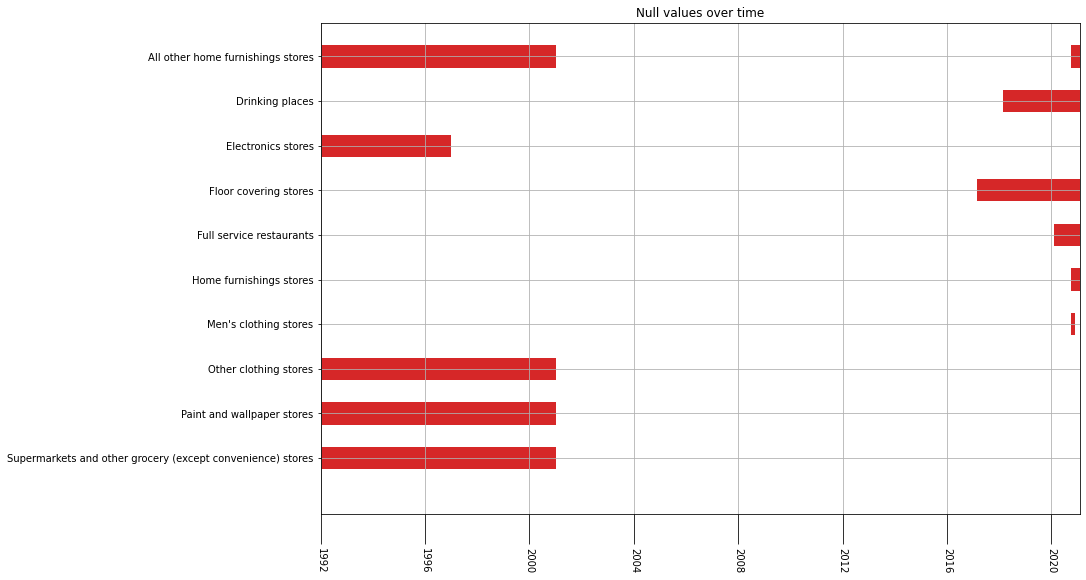

In [35]:
# Find visually where these points are and plot on a Gantt chart

# Initialize plot and set figure size
fig, ax = plt.subplots()
fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(12)

# Parameters for graph elements
cat_heights = 1
cat_list = []

# Make a new set of bars for each category
for cat, gap_set in null_gaps.items():
    for x in gap_set:
        ax.broken_barh([(x[0], (x[1] - x[0]).days) for x  in gap_set], (cat_heights, 1), facecolors='tab:red')
    # Add and adjust table elements
    cat_list.append(cat)
    cat_heights += 2

# Adjust table elements and draw graph
ax.set_ylim(0, 22)
ax.set_xlim(pd.to_datetime("1992-01"), pd.to_datetime("2021-02"))
ax.set_title('Null values over time')
ax.tick_params(axis = 'x', length=30, labelrotation = -90)
# Set labels and adjust spacing
ax.set_yticks([x*2 + 1.5 for x in range(0, len(cat_list))], labels=cat_list)
ax.grid(True)
ax.invert_yaxis()

#  Save image for reference
fig.savefig('null_plot.png', bbox_inches="tight")

In [36]:
# Write text report of nulls
null_report = open(f'null_report({date.today().strftime("%Y_%m_%d")}).txt', "w")
report_text = [f'Null values are found in the categories and gaps below:\n\n']
gap_count = 1
for cat, gaps in null_gaps.items():
    report_text.append(f'{cat}: \n')
    report_text.append(f'{round(null_cols[cat]*100, 2)}% of values are null.\n')
    for gap in gaps:
        report_text.append(f'    Gap {gap_count}: {gap[0]} to {gap[1] - timedelta(1)}\n')
        gap_count += 1
    report_text.append("\n")
    gap_count = 1

null_report.writelines(report_text)
null_report.close()



[Back to top](#Index)

## 3. Analysis and Visualization

A verification of the data as well as analysis are made after the ETL process.

The verification consists of running queries on counts and sums of the data through both MySQL Workbench and python, and comparing them to manual calculations done on the data.

Some advantages of running queries through MySQL Workbench, the graphical interface for MySQL, is that queries can be made directly without the use of connector objects and can be seen on the query input interface, limiting errors to the query itself and allowing for quick identification of issues. Running queries from python allows access to all of python's visualization and data manipulating tools on the retrieved data, enabling the  plotting of data on graphs and exporting the data to customized formats and mediums (JSON, JavaScript web pages, transfer to other databases, including no-SQL databases etc.)

The analyses made after this verification step were a general observation of the entire data set, reviewing general trends of a few chosen categories, reviewing a percent change of a separate set, and then the trends through a rolling window of a final set.

[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbech

A number of queries were made to the database requesting counts and sums over large portions of the data, checking results against manual calculations of the raw data set to verify the data was uploaded correctly.<br><br>

- A count of all records in the data set ((29 years* 12 months per year) + 2 months * 65 categories) should be 22,750 records
~~~~sql
SELECT COUNT(BusinessType) AS FullCount FROM mrts_data;
~~~~

- The sum of sales of all categories for 1992 should be 15,710,631
~~~~sql
SELECT SUM(Sale) FROM mrts_data
WHERE YEAR(Date) = 1992;
~~~~

- The sum of sales of all categories for all months available in 2021 should be 7,855,038
~~~~sql
SELECT SUM(Sale) FROM mrts_data
WHERE YEAR(Date) = 2021;
~~~~

[Back to top](#Index)

### 3.2 Running Queries From Python

The SQL queries above were executed through python, but allowed for custom input by the user through a terminal of which year to check the sum for. If the count of records did not match the manual count of 22,750, a warning message would appear in the terminal.

In [37]:
# Set up connection
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor(buffered = True)

# Query to get count of all rows
query_count = "SELECT COUNT(BusinessType) AS FullCount FROM mrts_data"
query = query_count
cursor.execute(query)
cnx.commit()
compare_val = cursor.fetchall()[0][0]
print(f"Required count: 22,750 \nReturned count: {'{:,}'.format(compare_val)}")
if compare_val == 22750:
    print(f"Successful ETL process")
# Show warning if count does not match
else: print(f"WARNING: Unsuccessful ETL process")

# Query for sum of a year
year = int(input('Please select year between 1992 - 2021: '))
while True:
    if year not in range(1992, 2022):
        year = int(input('Please ensure year selected is between 1992 - 2021: '))
        continue
    else:
        break
query_manual = f'SELECT SUM(Sale) FROM mrts_data\n\
WHERE YEAR(Date) = {year};'
query = query_manual
cursor.execute(query)
cnx.commit()
compare_val = cursor.fetchall()[0][0]
print(f"Returned sum for {year} is: {'{:,}'.format(compare_val)}")


Required count: 22,750 
Returned count: 22,750
Successful ETL process
Returned sum for 1992 is: 15,710,631


[Back to top](#Index)

### 3.3 Explore Trends

Economic trends are patterns in economic factors over time such as the rate in increase of GDP over several decades, or the effects of seasons on monthly spending. Identifying these patterns allows organizations to predict economic health of a business or population, allowing for informed, data-driven decision making.

Queries were executed retrieving all records in the dataset within a given category using the `WHERE` statement. One business category, "Sales over time for Retail and food services sales, total" is observed below.

In [38]:
# Null reports show "Retail and food services sales, total" has no null values.
#   Querying all years will result in accurate analysis.
foodret_query = """
    SELECT * FROM mrts_data
    WHERE BusinessType = "Retail and food services sales, total"
    """
query = foodret_query
foodret_result = pd.read_sql(query, con=cnx)
foodret_result


C:\Users\sanab\AppData\Local\Temp\ipykernel_22016\2146147196.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  foodret_result = pd.read_sql(query, con=cnx)


,RecordId,NAICSCode,BusinessType,Sale,Date
0,1,None,"Retail and food services sales, total",146376,1992-01-01
1,2,None,"Retail and food services sales, total",147079,1992-02-01
2,3,None,"Retail and food services sales, total",159336,1992-03-01
3,4,None,"Retail and food services sales, total",163669,1992-04-01
4,5,None,"Retail and food services sales, total",170068,1992-05-01
...,...,...,...,...,...
345,21850,None,"Retail and food services sales, total",553114,2020-10-01
346,21851,None,"Retail and food services sales, total",543273,2020-11-01
347,21852,None,"Retail and food services sales, total",611429,2020-12-01
348,22621,None,"Retail and food services sales, total",517119,2021-01-01


<AxesSubplot: title={'center': 'Sales over time for Retail and food services sales, total'}, xlabel='Date'>

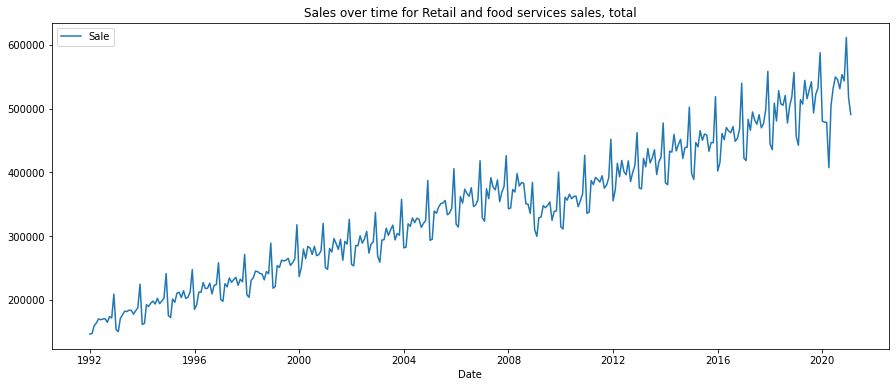

In [39]:
foodret_result.plot(
    x="Date",
    y="Sale",
    figsize=(15, 6),
    title='Sales over time for Retail and food services sales, total')

A trend over the full dataset is a general increase in spending totally, indicated by an upward movement of all the points over time. Repeated spikes and drops can be seen, implying seasonal spending patterns every year.

Two noticeable disruptions of the overall rise of sales through the data set can be seen as large drops of the line. One is present at 2009, and the other at 2020, which is where the housing collapse of 2009 and the COVID-19 outbreak occurred, respectively.

Another set of categories observed is the set below:
- Book stores
- Sporting goods stores
- Hobby, toy, and game stores

In [41]:
# Null reports show none of the categories have any null values.
#   Querying all years will provide accurate results.

booketc_query = """
    SELECT * FROM mrts_data
    WHERE BusinessType = "Book stores" OR
        BusinessType = "Sporting goods stores" OR
        BusinessType = "Hobby, toy, and game stores"
    """
query = foodret_query
booketc_result= pd.read_sql(query, con=cnx)
booketc_pivot = booketc_result.pivot(index=["Date"], columns=["BusinessType"], values="Sale")
booketc_pivot

C:\Users\sanab\AppData\Local\Temp\ipykernel_22016\3089798011.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  booketc_result= pd.read_sql(query, con=cnx)


BusinessType,"Retail and food services sales, total"
Date,
1992-01-01,146376
1992-02-01,147079
1992-03-01,159336
1992-04-01,163669
1992-05-01,170068
...,...
2020-10-01,553114
2020-11-01,543273
2020-12-01,611429


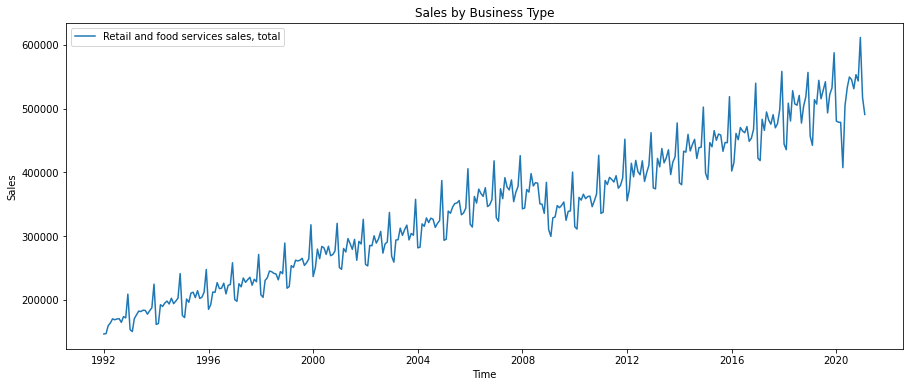

In [42]:
fig = plt.figure(figsize=(15, 6))
for cat in booketc_pivot:
    plt.plot(booketc_pivot[cat], label=cat)

plt.legend()

plt.ylabel('Sales')
plt.xlabel('Time')
plt.title('Sales by Business Type')
plt.show()

Overall, "Sporting goods stores" had the highest values, with "Hobby, toy and games stores" next highest, and "Books" at the lowest.
Sporting goods grew the fastest, contributing to its position as the highest trend out of the three. A seasonal pattern exists for all three categories,  however Sporting goods stores exhibit the highest seasonal effects, demonstrated by how much bigger its spikes are against the other category. In the year 2020, the beginning of the COVID-19 outbreak, a drop in sales for all three categories can be seen, with book stores being the only category that didn't seem to recover.

[Back to top](#Index)

### 3.4 Explore Percentage Change

Percentage change is a measure of how much a measurement changed over time as a percentage. For example, the observed period for the percent change may be a week, and the value increased from 100 at the beginning of the week to 110 at the beginning of the next week. The percentage change would be 10% over the week. Percentage change measurements provide insight to the growth rate of a measurement over time, or volatility in reaction to an event.

The query for this analysis includes the categories "Men's clothing stores" and Women's clothing stores". Reviewing the null report, some null records were found to exist near the end of the data set, so the query will omit any data after the beginning of this gap.

In [43]:
# Men's clothing stores have null values in 2020
# Search only for dates before 2020-10-01
clothing_query = """
    SELECT * FROM mrts_data
    WHERE (BusinessType = "Men's clothing stores" OR
        BusinessType = "Women's clothing stores") AND
        Date < "2020-10-01"
    """

query = clothing_query
clothing_result = pd.read_sql(query, con=cnx)
clothing_pivot = clothing_result.pivot(index=["Date"], columns=["BusinessType"], values="Sale")
clothing_pctchange = clothing_pivot.pct_change()
clothing_pctchange

C:\Users\sanab\AppData\Local\Temp\ipykernel_22016\2295094241.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  clothing_result = pd.read_sql(query, con=cnx)


BusinessType,Men's clothing stores,Women's clothing stores
Date,,
1992-01-01,NaN,NaN
1992-02-01,-0.061341,0.063001
1992-03-01,0.110942,0.206931
1992-04-01,0.116279,0.109030
1992-05-01,0.049020,0.032645
...,...,...
2020-05-01,0.802326,1.343284
2020-06-01,0.954839,0.844404
2020-07-01,0.336634,0.170696


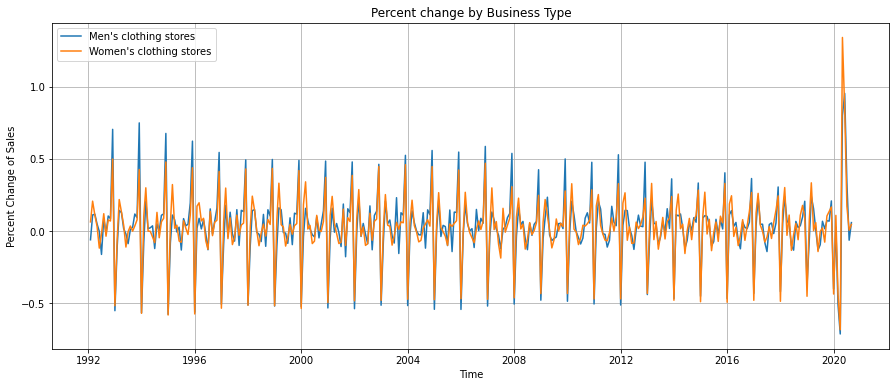

In [44]:
fig = plt.figure(figsize=(15, 6))
for cat in clothing_pctchange:
    plt.plot(clothing_pctchange[cat], label=cat)

plt.legend()
plt.grid(True)
plt.ylabel('Percent Change of Sales')
plt.xlabel('Time')
plt.title('Percent change by Business Type')
plt.show()

The percent change between sales of men's and women's clothing appears roughly identical, perhaps with greater positive change in  men through the time period.

In [45]:
clothing_pcttotal = pd.DataFrame(clothing_pivot["Men's clothing stores"] + clothing_pivot["Women's clothing stores"], columns = ["Clothing stores Totals"])
clothing_pcttotal["Men's clothing stores %"] = clothing_pivot["Men's clothing stores"]/clothing_pcttotal["Clothing stores Totals"]*100
clothing_pcttotal["Women's clothing stores %"] = clothing_pivot["Women's clothing stores"]/clothing_pcttotal["Clothing stores Totals"]*100
clothing_pcttotal

,Clothing stores Totals,Men's clothing stores %,Women's clothing stores %
Date,,,
1992-01-01,2574,27.233877,72.766123
1992-02-01,2649,24.839562,75.160438
1992-03-01,3134,23.324825,76.675175
1992-04-01,3481,23.441540,76.558460
1992-05-01,3608,23.725055,76.274945
...,...,...,...
2020-05-01,1254,12.360447,87.639553
2020-06-01,2330,13.004292,86.995708
2020-07-01,2778,14.578834,85.421166


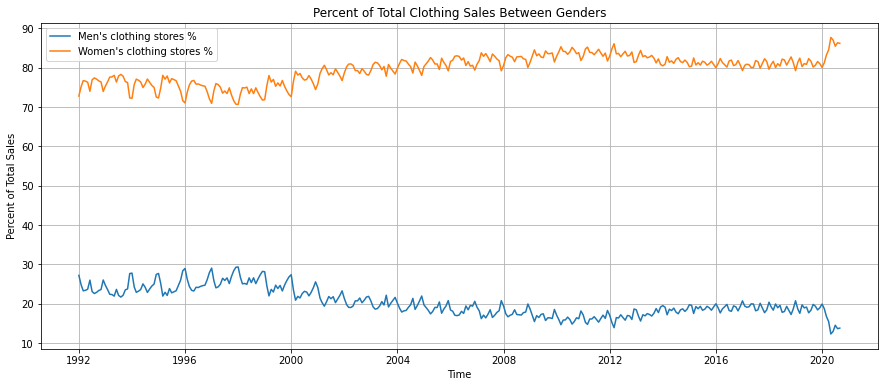

In [46]:
fig = plt.figure(figsize=(15, 6))

for cat in clothing_pcttotal.columns[1:3]:
    plt.plot(clothing_pcttotal[cat], label=cat)

plt.legend()
plt.grid(True)
plt.ylabel('Percent of Total Sales')
plt.xlabel('Time')
plt.title('Percent of Total Clothing Sales Between Genders')
plt.show()

Reviewing the percent change of the contribution of sales to the sum between men's and women's clothing, sales of women's clothing greatly outweigh men's. As the contribution of sales the sum from one gender's clothing rises, the other drops. Over time the share of sales has become more polarized with the change of shares in sales of women's  clothing greatly outweighing the men's share of sales.

[Back to top](#Index)

### 3.5 Explore Rolling Time Windows

Three categories were chosen of distinctly different business categories, hypothesized to have different spending patterns by customers:
- Gasoline stations
- Grocery stores
- Hobby, toy, and game stores

The query will retrieve records from these categories over the entire data set. Once in python, a transformation for the rolling window would be applied at a window size of 6 months (6 data points).

In [47]:
# Null reports show none of the categories have any null values.
#   Querying all years will provide accurate results.
misc_query = """
    SELECT * FROM mrts_data
    WHERE (BusinessType = "Grocery stores" OR
        BusinessType = "Hobby, toy, and game stores" OR
        BusinessType = "Gasoline stations")
    """

query = misc_query
misc_result = pd.read_sql(query, con=cnx)
misc_pivot = misc_result.pivot(index=["Date"], columns=["BusinessType"], values="Sale")
misc_roll = misc_pivot.rolling(window = 6).sum()[5:]
misc_roll

C:\Users\sanab\AppData\Local\Temp\ipykernel_22016\667802026.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  misc_result = pd.read_sql(query, con=cnx)


BusinessType,Gasoline stations,Grocery stores,"Hobby, toy, and game stores"
Date,,,
1992-06-01,75270.0,165274.0,3935.0
1992-07-01,77045.0,167447.0,3993.0
1992-08-01,79290.0,169869.0,4061.0
1992-09-01,80158.0,170109.0,4056.0
1992-10-01,81378.0,171104.0,4139.0
...,...,...,...
2020-10-01,221357.0,389918.0,8713.0
2020-11-01,223706.0,385402.0,10005.0
2020-12-01,224027.0,388456.0,11202.0


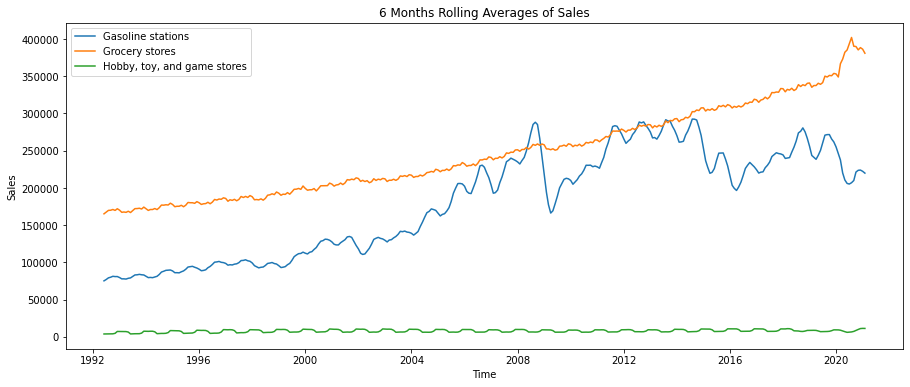

In [48]:
fig = plt.figure(figsize=(15, 6))
for cat in misc_roll:
    plt.plot(misc_roll[cat], label=cat)

plt.legend()

plt.ylabel('Sales')
plt.xlabel('Time')
plt.title('6 Months Rolling Averages of Sales')
plt.show()

Markedly different trends appear between the three selected categories. Grocery stores sales steadily rise through the entire data set. Gas station sales also rise throughout the data set, however demonstrate high volatility, reacting significantly to the 2009 housing crisis. Hobby, toy and game stores contrast greatly from these trends, remaining roughly the same for the entire data set. Interestingly, there was a large spike of sales in groceries at the beginning of the COVID-19 pandemic.

[Back to top](#Index)

## Conclusion

For the analysis, businesses that attract the most spending seem to be "necessity items" like groceries and gasoline. Hobby-related businesses seem to have seen no growth in the entire data set period, and may. This may imply that investments which will grow will be in the markets of "necessity items".

Additionally, the impact of major economic crises (i.e. the 2009 housing crisis and the COVID-19 pandemic) can be seen over many of the categories as large dips in spending in most, and large spikes in others like groceries.
For the ETL process, utilizing python as a driver of the process allowed for successful transposition and exporting of the data to a cleaned and accessible data set. The null reporting allows for flexibility of analyst teams to use the entire data set and also be made aware of the null values to help draw more accurate conclusions about the data. This balance of accessibility and accuracy was successfully achieved through the proper application of an ETL process.


[Back to top](#Index
)
## References

- "Monthly Retail Trade." census.gov. U.S. Department of Commerce , 2022. https://www.census.gov/retail/index.html .
- "Rolling-Window Analysis of Time-Series Models." MathWorks. The MathWorks, Inc., 2022. https://www.mathworks.com/help/econ/rolling-window-estimation-of-state-space-models.html .
- Kenton, Will. "Percentage Changes and How to Calculate Them." . Investopedia, 2022. https://www.investopedia.com/terms/p/percentage-change.asp .

